# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

In [15]:
N = 7
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Daily_Usage_Hours'

In [14]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('datasets/teen_phone_addiction_dataset.csv')
data = all_data['Daily_Usage_Hours']
print(data.head(10).to_string(index=False))
print(f'Размер данных: {len(data)}')

4.0
5.5
5.8
3.1
2.5
3.9
6.3
5.1
3.0
3.9
Размер данных: 3000


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [16]:
# 1. Среднее
def calculate_mean(data):
    return data.sum() / len(data)

# 2. Дисперсия
def calculate_variance(data):
    mean = calculate_mean(data)
    return ((data - mean) ** 2).sum() / len(data)

# 3. Мода
def calculate_mode(data):
    values, counts = np.unique(data, return_counts=True)
    max_count = counts.max()
    return values[counts == max_count].tolist()

# 4. Медиана
def calculate_median(data):
    sorted_data = data.sort_values().reset_index(drop=True)
    n = len(sorted_data)
    if n % 2 == 1:
        return sorted_data[n // 2]
    else:
        return (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

# 5. Квантили уровня 0.25, 0.5, 0.75
def calculate_quantile(data, p):
    sorted_data = data.sort_values().reset_index(drop=True)
    n = len(sorted_data)
    position = (n - 1) * p
    lower_index = int(position)
    upper_index = min(lower_index + 1, n - 1)
    weight = position - lower_index
    return sorted_data[lower_index] * (1 - weight) + sorted_data[upper_index] * weight

# 6. Эксцесс
def calculate_kurtosis(data):
    mean = calculate_mean(data)
    n = len(data)
    m4 = ((data - mean) ** 4).sum() / n
    variance = calculate_variance(data)
    return m4 / (variance ** 2) - 3

# 7. Асимметрия
def calculate_skewness(data):
    mean = calculate_mean(data)
    n = len(data)
    m3 = ((data - mean) ** 3).sum() / n
    variance = calculate_variance(data)
    return m3 / (variance ** 1.5)

# 8. Интерквартильный размах
def calculate_iqr(data):
    q1 = calculate_quantile(data, 0.25)
    q3 = calculate_quantile(data, 0.75)
    return q3 - q1

In [17]:
stats_dict = {
    '1. Mean': calculate_mean(data),
    '2. Variance': calculate_variance(data),
    '3. Mode': calculate_mode(data),
    '4. Median': calculate_median(data),
    '5.1 (Quantile 0.25)': calculate_quantile(data, 0.25),
    '5.2 (Quantile 0.50)': calculate_quantile(data, 0.50),
    '5.3 (Quantile 0.75)': calculate_quantile(data, 0.75),
    '6. Kurtosis': calculate_kurtosis(data),
    '7. Skewness': calculate_skewness(data),
    '8. IQR': calculate_iqr(data)
}

for stat, value in stats_dict.items():
    print(f"{stat}: {value}")

1. Mean: 5.020666666666667
2. Variance: 3.8266195555555558
3. Mode: [4.4]
4. Median: 5.0
5.1 (Quantile 0.25): 3.7
5.2 (Quantile 0.50): 5.0
5.3 (Quantile 0.75): 6.4
6. Kurtosis: -0.1226141759584718
7. Skewness: 0.016197292999157852
8. IQR: 2.7


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data, bins=20, title="Гистограмма распределения"):

    plt.figure(figsize=(10, 6))
    
    n, bins, patches = plt.hist(data, bins=bins, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Плотность вероятности', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_ecdf(data, title="Эмпирическая функция распределения"):

    plt.figure(figsize=(10, 6))
    
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    
    plt.step(x, y, where='post', color='blue', linewidth=2)
    
    plt.title(title, fontsize=14)
    plt.xlabel('Значения', fontsize=12)
    plt.ylabel('Вероятность', fontsize=12)
    plt.grid(alpha=0.3)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

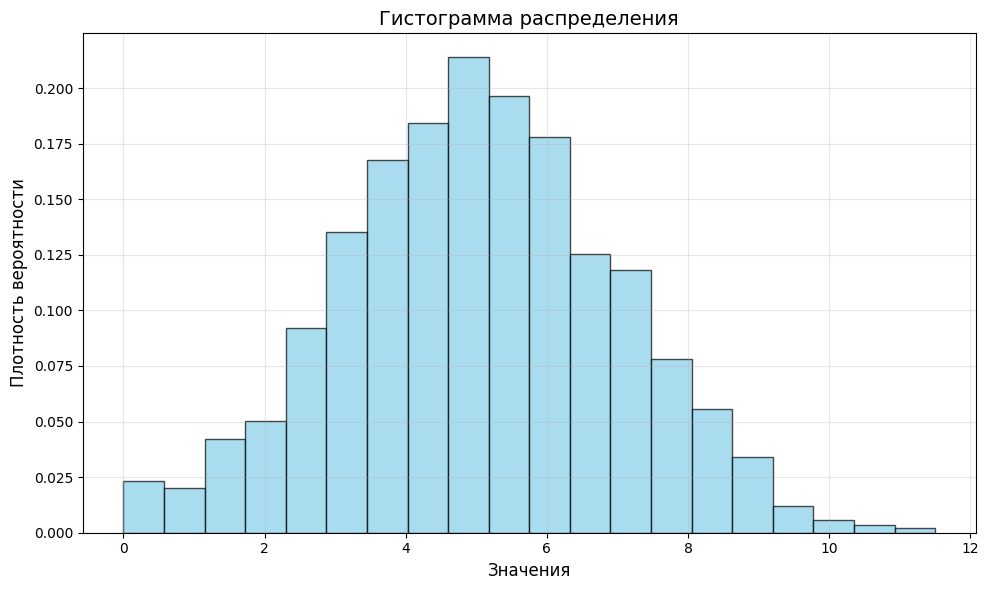

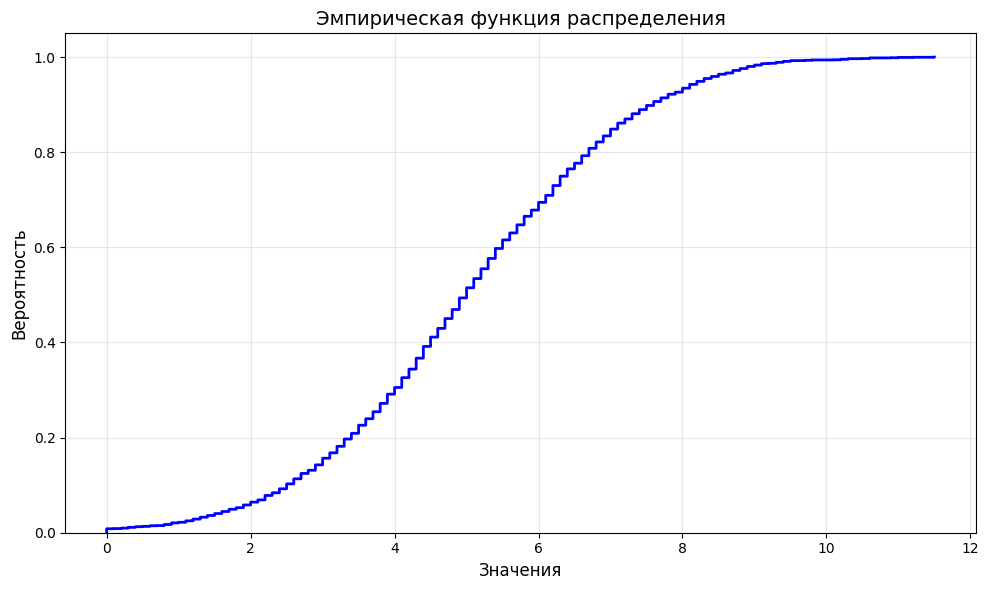

In [19]:
plot_histogram(data)
plot_ecdf(data)

По гистограмме и ЭФР распределение можно считать нормальным.

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [21]:
import numpy as np
import scipy.stats as stats
import math
def chi_square_test(data, alpha=0.05):
    n = len(data)
    mu = calculate_mean(data)
    sigma = np.std(data, ddof=1)
    k = int(1 + np.log2(n))
    observed, bins = np.histogram(data, bins=k)
    cdf = stats.norm.cdf(bins, loc=mu, scale=sigma)
    expected = n * np.diff(cdf)
    chi2_stat = ((observed - expected) ** 2 / expected).sum()
    df = k - 1 - 2
    chi2_crit = stats.chi2.ppf(1 - alpha, df)
    return {
        'chi2_stat': chi2_stat,
        'chi2_crit': chi2_crit,
        'df': df,
        'p_value': 1 - stats.chi2.cdf(chi2_stat, df),
        'H0_normal': chi2_stat < chi2_crit
    }

def skewness_kurtosis_test(data, alpha=0.05):
    n = len(data)
    skew = calculate_skewness(data)
    kurt = calculate_kurtosis(data)
    se_skew = np.sqrt(6 / n)
    se_kurt = np.sqrt(24 / n)
    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt
    z_crit = stats.norm.ppf(1 - alpha / 2)
    return {
        'skew': skew,
        'kurtosis': kurt,
        'z_skew': z_skew,
        'z_kurt': z_kurt,
        'z_crit': z_crit,
        'H0_normal': (abs(z_skew) < z_crit) and (abs(z_kurt) < z_crit)
    }

def print_results(title, results):
    print(f"\n{title}")
    print("-" * len(title))
    for key, value in results.items():
        if isinstance(value, float):
            print(f"{key:12} : {value:.4f}")
        else:
            print(f"{key:12} : {value}")

In [23]:
print_results("Chi test", chi_square_test(data))
print_results("Skewness kurtosis test", skewness_kurtosis_test(data))


Chi test
--------
chi2_stat    : 23.1686
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0058
H0_normal    : False

Skewness kurtosis test
----------------------
skew         : 0.0162
kurtosis     : -0.1226
z_skew       : 0.3622
z_kurt       : -1.3709
z_crit       : 1.9600
H0_normal    : True


По результатам хи распределение не нормальное; по тесту Жарке—Бера - нормальное.

In [26]:
import scipy.stats as stats

def qq_plot(data, dist="norm", loc=None, scale=None):
    if loc is None:
        loc = calculate_mean(data)
    if scale is None:
        scale = np.std(data, ddof=1)
        
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)), loc=loc, scale=scale)
    sample_quantiles = np.sort(data)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5)
    plt.plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
             [theoretical_quantiles.min(), theoretical_quantiles.max()], 
             'r--', linewidth=2)
    plt.xlabel('Теоретические квантили')
    plt.ylabel('Выборочные квантили')
    plt.title('Q-Q plot')
    plt.show()

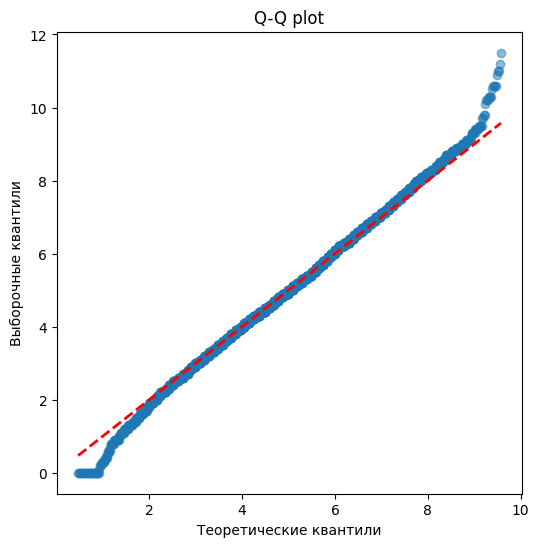

In [27]:
qq_plot(data)

На концах выборочные квантили отклоняются от теоретических, в центральной части совпадение хорошее.

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

In [28]:
values = {val for val in data}
print(sorted(values))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.7, 9.8, 10.1, 10.2, 10.3, 10.5, 10.6, 10.9, 11.0, 11.2, 11.5]


Очевидные выбросы не просматриваются. Далее применим методы масштабирования - нормализацию и стандартизацию.

In [29]:
standardized = (data - calculate_mean(data)) / np.sqrt(calculate_variance(data))

normalized = (data - data.min()) / (data.max() - data.min())

stats_dict = {
    '1. Mean': calculate_mean(standardized),
    '2. Variance': calculate_variance(standardized),
    '3. Mode': calculate_mode(standardized),
    '4. Median': calculate_median(standardized),
    '5.1 (Quantile 0.25)': calculate_quantile(standardized, 0.25),
    '5.2 (Quantile 0.50)': calculate_quantile(standardized, 0.50),
    '5.3 (Quantile 0.75)': calculate_quantile(standardized, 0.75),
    '6. Kurtosis': calculate_kurtosis(standardized),
    '7. Skewness': calculate_skewness(standardized),
    '8. IQR': calculate_iqr(standardized)
}

print("Статистики для стандартизированного набора данных:")
for stat, value in stats_dict.items():
    print(f"{stat}: {value}")
print()
stats_dict = {
    '1. Mean': calculate_mean(normalized),
    '2. Variance': calculate_variance(normalized),
    '3. Mode': calculate_mode(normalized),
    '4. Median': calculate_median(normalized),
    '5.1 (Quantile 0.25)': calculate_quantile(normalized, 0.25),
    '5.2 (Quantile 0.50)': calculate_quantile(normalized, 0.50),
    '5.3 (Quantile 0.75)': calculate_quantile(normalized, 0.75),
    '6. Kurtosis': calculate_kurtosis(normalized),
    '7. Skewness': calculate_skewness(normalized),
    '8. IQR': calculate_iqr(normalized)
}

print("Статистики для нормализированного набора данных:")
for stat, value in stats_dict.items():
    print(f"{stat}: {value}")

Статистики для стандартизированного набора данных:
1. Mean: -2.0250467969162856e-16
2. Variance: 1.0
3. Mode: [-0.3172859043046986]
4. Median: -0.01056483677061852
5.1 (Quantile 0.25): -0.6751271497611256
5.2 (Quantile 0.50): -0.01056483677061852
5.3 (Quantile 0.75): 0.7051176541422356
6. Kurtosis: -0.12261417595847046
7. Skewness: 0.016197292999158383
8. IQR: 1.3802448039033612

Статистики для нормализированного набора данных:
1. Mean: 0.4365797101449275
2. Variance: 0.028934741440873768
3. Mode: [0.3826086956521739]
4. Median: 0.43478260869565216
5.1 (Quantile 0.25): 0.32173913043478264
5.2 (Quantile 0.50): 0.43478260869565216
5.3 (Quantile 0.75): 0.5565217391304348
6. Kurtosis: -0.12261417595847135
7. Skewness: 0.01619729299915866
8. IQR: 0.23478260869565215


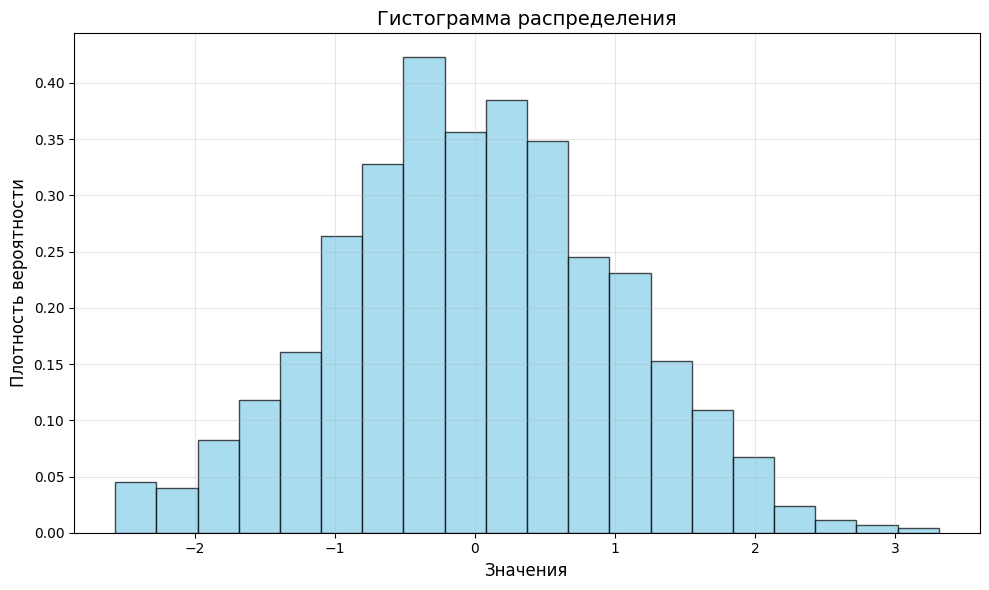

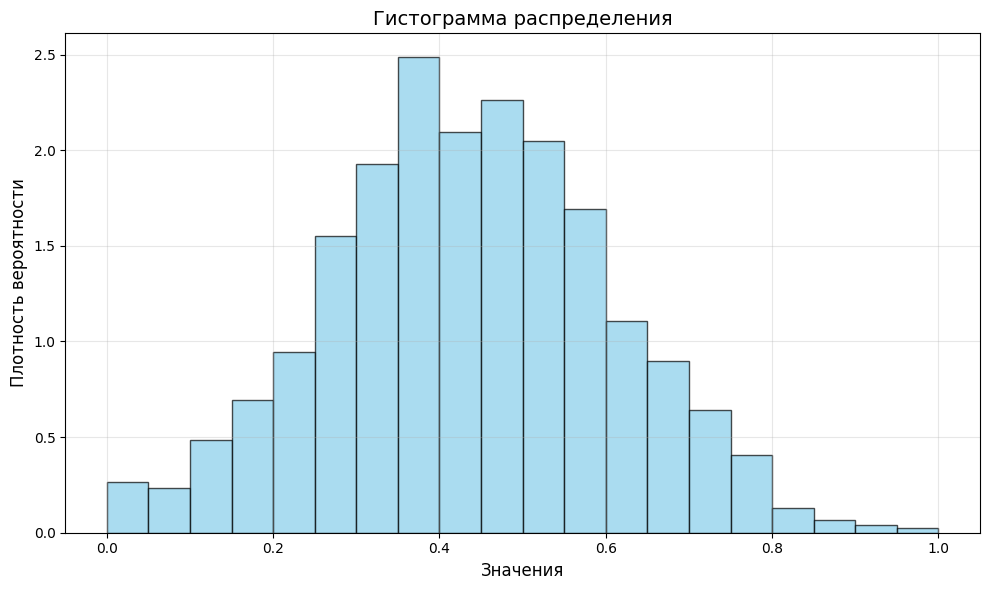

In [30]:
plot_histogram(standardized)
plot_histogram(normalized)

In [31]:
print_results("Chi test standardized", chi_square_test(standardized))
print_results("Skewness kurtosis test standardized", skewness_kurtosis_test(standardized))

print_results("Chi test normalized", chi_square_test(normalized))
print_results("Skewness kurtosis test normalized", skewness_kurtosis_test(normalized))


Chi test standardized
---------------------
chi2_stat    : 23.1686
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0058
H0_normal    : False

Skewness kurtosis test standardized
-----------------------------------
skew         : 0.0162
kurtosis     : -0.1226
z_skew       : 0.3622
z_kurt       : -1.3709
z_crit       : 1.9600
H0_normal    : True

Chi test normalized
-------------------
chi2_stat    : 23.1686
chi2_crit    : 16.9190
df           : 9
p_value      : 0.0058
H0_normal    : False

Skewness kurtosis test normalized
---------------------------------
skew         : 0.0162
kurtosis     : -0.1226
z_skew       : 0.3622
z_kurt       : -1.3709
z_crit       : 1.9600
H0_normal    : True


Как видим, стандартизация и нормализация не повлияли на форму распределения. Попробуем применить логорифмирование

In [32]:
if (data <= 0).any():
    eps = abs(data.min()) + 1e-6
else:
    eps = 0
logged = np.log(data + eps)

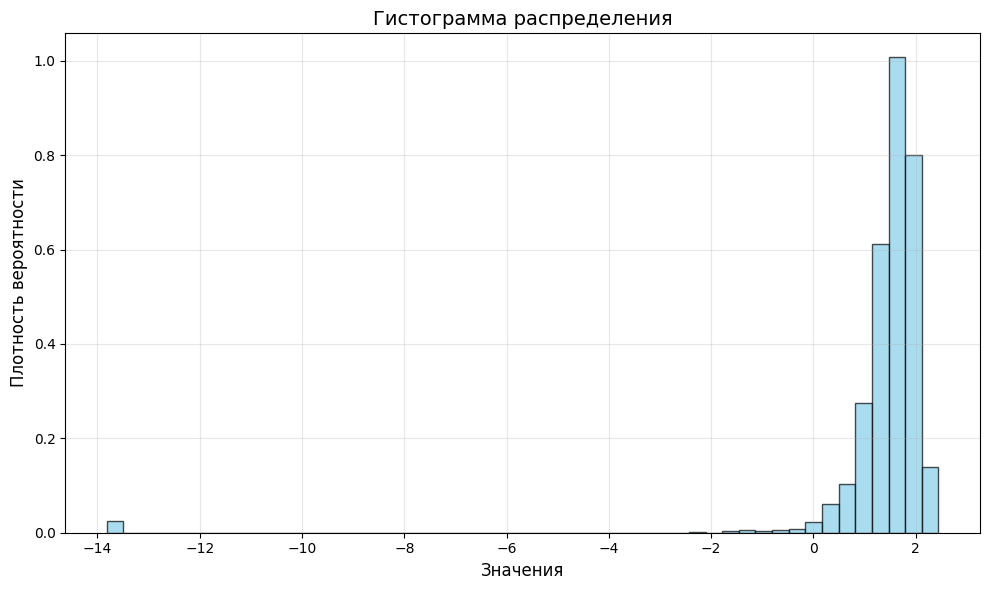

In [33]:
plot_histogram(logged, bins = 50)

Как видим, логорифмирование не помогло, и самое близкое к чему мы приблизились - это  изначальное распределение проходящее по одному из двух критериев.

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

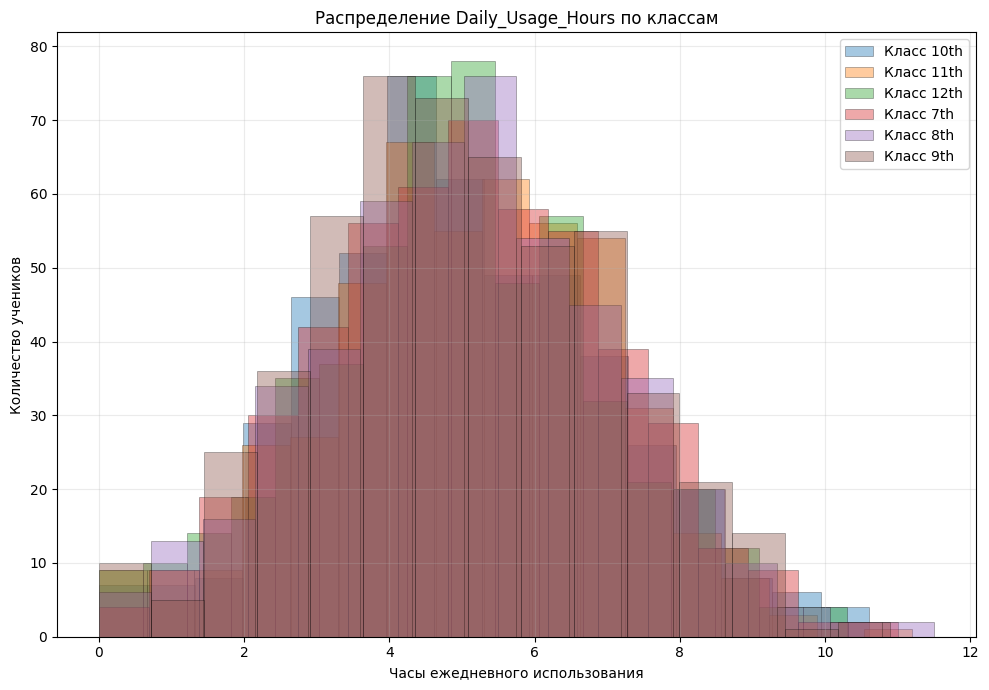

In [36]:
grouped = all_data.groupby("School_Grade")

plt.figure(figsize=(10, 7))
for grade, subset in grouped:
    q75, q25 = np.percentile(subset["Daily_Usage_Hours"].dropna(), [75 ,25])
    iqr = q75 - q25
    n = len(subset)
    if iqr > 0 and n > 1:
        bin_width = 2 * iqr / (n ** (1/3))
        bins = int((subset["Daily_Usage_Hours"].max() - subset["Daily_Usage_Hours"].min()) / bin_width) or 5
    else:
        bins = 5

    plt.hist(
        subset["Daily_Usage_Hours"].dropna(),
        bins=bins,
        alpha=0.4,
        edgecolor="black",
        linewidth=0.5,
        label=f"Класс {grade}"
    )

plt.xlabel("Часы ежедневного использования")
plt.ylabel("Количество учеников")
plt.title("Распределение Daily_Usage_Hours по классам")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


In [37]:
stats = grouped['Daily_Usage_Hours'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Variance', 'var'),
    ('Min', 'min'),
    ('Max', 'max')
])
print("Статистика по группам:")
print(stats)

Статистика по группам:
              Count      Mean  Variance  Min   Max
School_Grade                                      
10th            487  4.977618  3.812605  0.0  10.6
11th            479  5.061795  3.635211  0.0  11.2
12th            529  4.936862  3.735589  0.0  10.3
7th             497  5.077062  3.883344  0.0  11.0
8th             482  5.066390  4.009513  0.0  11.5
9th             526  5.012167  3.912652  0.0  10.9


Гистограммы и сводные метрики не указывают на существенные различия между классами; по формальному критерию различия не значимы.